# Lab 1 MSDS 7331 Section 404

## Johnson Ekedum, Ekaterina Pirogova, Victor Yim

### 9/17/2017


### Business Understanding

Diabetes is a disease in which the body’s ability to produce or respond to the hormone insulin is impaired.  This causes the elevation of glucose level in the blood and urine.  Complication from diabetes can lead to further cardiovascular disease, nerve damage, kidney failure, eye damage and many others.   Researchers and doctors have been working on prevention and care for decades.  This project is an attempt to leverage the data collected from 1999 to 2008 on over one hundred thousand patient from clinical care at 130 hospitals.  50 features were collected on the patients and the hospital outcome.  


### Data Understanding

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

For this analysis, we leveraged a dataset from UCI Machine Learning Repository.  https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
The dataset contains over 100,000 records of patients' visit to over 130 hospitals.  There are 50 variables in the datasets.  Reference table below is the summary description of the variables obtained from BioMed Research International Journal publication.  https://www.hindawi.com/journals/bmri/2014/781670/

Data Description:                                                                                                                                  

**Feature name**|**Type**|**Description and values**
:-----:|:-----:|:-----:
Encounter ID|Numeric|Unique identifier of an encounter
Patient number|Numeric|Unique identifier of a patient
Race|Nominal|Values: Caucasian / Asian / African American / Hispanic / and other
Gender|Nominal|Values: male / female / and unknown/invalid
Age|Nominal|Grouped in 10-year intervals: 0 - 10)  10 - 20) / … / 90 - 100)
Weight|Numeric|Weight in pounds.
Admission type|Nominal|Integer identifier corresponding to 9 distinct values. For example emergency / urgent / elective / newborn / and not available
Discharge disposition|Nominal|Integer identifier corresponding to 29 distinct values. For example discharged to home / expired / and not available
Admission source|Nominal|Integer identifier corresponding to 21 distinct values. For example physician referral / emergency room / and transfer from a hospital
Time in hospital|Numeric|Integer number of days between admission and discharge
Payer code|Nominal|Integer identifier corresponding to 23 distinct values. For example Blue Cross/Blue Shield / Medicare / and self-pay
Medical specialty|Nominal|Integer identifier of a specialty of the admitting physician / corresponding to 84 distinct values / for example / cardiology / internal medicine / family/general practice / and surgeon
Number of lab procedures|Numeric|Number of lab tests performed during the encounter
Number of procedures|Numeric|Number of procedures (other than lab tests) performed during the encounter
Number of medications|Numeric|Number of distinct generic names administered during the encounter
Number of outpatient visits|Numeric|Number of outpatient visits of the patient in the year preceding the encounter
Number of emergency visits|Numeric|Number of emergency visits of the patient in the year preceding the encounter
Number of inpatient visits|Numeric|Number of inpatient visits of the patient in the year preceding the encounter
Diagnosis 1|Nominal|The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
Diagnosis 2|Nominal|Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
Diagnosis 3|Nominal|Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
Number of diagnoses|Numeric|Number of diagnoses entered to the system
Glucose serum test result|Nominal|Indicates the range of the result or if the test was not taken. Values: “>200 /” “>300 /” “normal /” and “none” if not measured
A1c test result|Nominal|Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8% / “>7” if the result was greater than 7% but less than 8% / “normal” if the result was less than 7% / and “none” if not measured.
Change of medications|Nominal|Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
Diabetes medications|Nominal|Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
24 features for medications|Nominal|For the generic names: metformin / repaglinide / nateglinide / chlorpropamide / glimepiride / acetohexamide / glipizide / glyburide / tolbutamide / pioglitazone / rosiglitazone / acarbose / miglitol / troglitazone / tolazamide / examide / sitagliptin / insulin / glyburide-metformin / glipizide-metformin / glimepiride-pioglitazone / metformin-rosiglitazone / and metformin-pioglitazone / the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter / “down” if the dosage was decreased / “steady” if the dosage did not change / and “no” if the drug was not prescribed
Readmitted|Nominal|Days to inpatient readmission. Values: “30” if the patient was readmitted in more than 30 days / and “No” for no record of readmission.


Our team performed further validation to ensure descriptions match to the dataset.  A few variances were detected and adjustment was made.  


====================================================================================================================



#### Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.


##### Missing values

The dataset contains 101,766 records.  Missing values vary greatly among variables. 

**Variable**|**Missing Values**|**% of Missing Values**
-----|-----|-----
race|2273|2.23%
gender (unknown)|3|0.003%
weight|98567|96.85%
payer\_code|40256|39.56%
medical\_specialty|49949|49.08%
diag\_2|358|0.35%
diag\_3|1423|1.40%

Only the 7 variables above contain missing values.  All the other variables have complete records.  In regards to gender, while they are not labeled as missing value, the "unknown" population nonetheless provide challenges to the analysis.  Therefore, we treated the 3 records as missing values and will make attempt to look for statistical method to imput the values.  
For diag_2 (secondary diagnosis) and diag_3 (additional secondary diagnosis), it is highly possible for patient to have only diag_1 (primary diagnosis).  Therefore, any missing values can be treated as "not applicable".  However, there are 79 records with diag_3 but without diag_2.  Further analysis needs to be done to either imput diag_2 on those records or treat diag_3 as missing label from diag_2.

##### Duplicate Data

Since each of the records within this dataset is intended to identify each visit, there are no duplicate records among this dataset.  However, if a patient has multiple visits it would have separate records denote each visit.  Upon further evaluation, there are 16,773 patients with multiple visits.  

**Number of visits**|**Count of Patients**
:-----:|:-----:
40|1
28|1
23|3
22|2
21|1
20|6
19|3
18|6
17|3
16|4
15|9
14|5
13|14
12|19
11|20
10|42
9|70
8|111
7|207
6|346
5|717
4|1421
3|3328
2|10434

Pending the type of future analysis, unique patient records may be more suitable for prediction.   

##### Outliers
While majority of variables have no missing value, the distribution of values greatly differ.  For example, number_outpatient, number_emergency and number_inpatient all have greater than 90% of values as 0.  
Variable number_diagnoses distribution drops off at 9 with only 114 records with value > = 10.  Further evaluation maybe need to confirm data accuracy.

====================================================================================================================

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDA60EE0F0>]], dtype=object)

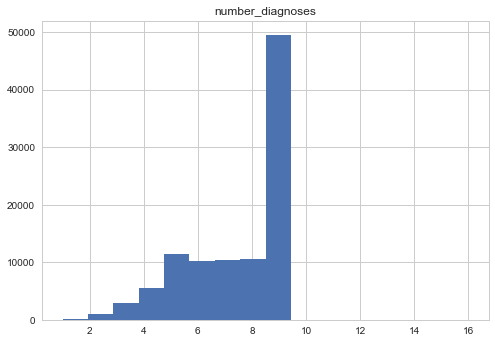

In [16]:
pd.DataFrame.hist(diab, column='number_diagnoses', bins=16)


#### Are there other features that could be added to the data or created from existing features? Which ones? 

After exploring the 50 variables, we tried to evaluate the  

====================================================================================================================

#### data quality
We detected a few data discrepancy in our data exploration phase.  

1)	Number of medications - while the data description explains there should be 24 medications, only 23 medications were contained in the dataset.

2)	Change – there are 2 levels (Ch/No) to denote if the prescription was changed from the visit.  However, the “Ch” records do not match the actual records of the medication in some cases.

3)	diag_2/diag_3 – there are patients with diag_3 values without diag_2.
 


### Data Preparation



The dataset mainly contains categorial data and many with high numbers of levels. In the case of diag_1, diag_2 and diag_3, we were able to use the coding description to combine them into 10 groups of dianogsiss.  


In [2]:
# import all referenced libraries and set graph and chart style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import warnings
import seaborn as sns
import matplotlib as mpl
import pylab
from sklearn.decomposition import PCA
from sklearn import datasets as ds

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

diab = pd.read_csv('C:/Users/Victor Yim/Downloads/diabetic_data.csv')

# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)

# convert columns to categorial variables
categ_features = ['race','gender','age','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3'
                  ,'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide'
                  ,'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone'
                  ,'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton'
                  ,'insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone'
                  ,'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted'
                  ,'medical_specialty']

# convert columns to continuous features variables
continuous_features = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications'
                       ,'number_outpatient','number_emergency','number_inpatient','number_diagnoses']

# convert columns to ID features variables
id_features = ['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id']

#examide and citoglipton medications nobody used. Can drop variables
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)

#create new column for readmitted_Group based.  Anyone readmitted = 1 else = 0
diab['readmitted_Group'] = 0
diab['readmitted_Group'][diab['readmitted']==">30"] = 1
diab['readmitted_Group'][diab['readmitted']=="<30"] = 1

diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"


#returning diag_1, diag_2, diag_3 to the previous state.
diag_num=["diag_1","diag_2","diag_3"]
#correct type
diab[diag_num] = diab[diag_num].astype("str")
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'-2':'V'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'-1':'E'}, regex=True)


#weigth is coded as meausrement taken or not
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"


admission_type_id_dict = {"1" : "Emergency",
"2" : "Urgent",
"3" : "Elective",
"4" : "Newborn",
"5" : "Not Available",
"6" : "NULL",
"7" : "Trauma Center",
"8" : "Not Mapped"}


discharge_disposition_id_dict= {"1" : "Discharged to home",
"2" : "Discharged/transferred to another short term hospital",
"3" : "Discharged/transferred to SNF",
"4" : "Discharged/transferred to ICF",
"5" : "Discharged/transferred to another type of inpatient care institution",
"6" : "Discharged/transferred to home with home health service",
"7" : "Left AMA",
"8" : "Discharged/transferred to home under care of Home IV provider",
"9" : "Admitted as an inpatient to this hospital",
"10" : "Neonate discharged to another hospital for neonatal aftercare",
"11" : "Expired",
"12" : "Still patient or expected to return for outpatient services",
"13" : "Hospice / home",
"14" : "Hospice / medical facility",
"15" : "Discharged/transferred within this institution to Medicare approved swing bed",
"16" : "Discharged/transferred/referred another institution for outpatient services",
"17" : "Discharged/transferred/referred to this institution for outpatient services",
"18" : "NULL",
"19" : "Expired at home. Medicaid only, hospice.",
"20" : "Expired in a medical facility. Medicaid only, hospice.",
"21" : "Expired, place unknown. Medicaid only, hospice.",
"22" : "Discharged/transferred to another rehab fac including rehab units of a hospital .",
"23" : "Discharged/transferred to a long term care hospital.",
"24" : "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"25" : "Not Mapped",
"26" : "Unknown/Invalid",
"30" : "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
"27" : "Discharged/transferred to a federal health care facility.",
"28" : "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"29" : "Discharged/transferred to a Critical Access Hospital (CAH)."}


discharge_disposition_id_dict= {"1" : " Physician Referral",
"2" : "Clinic Referral",
"3" : "HMO Referral",
"4" : "Transfer from a hospital",
"5" : " Transfer from a Skilled Nursing Facility (SNF)",
"6" : " Transfer from another health care facility",
"7" : " Emergency Room",
"8" : " Court/Law Enforcement",
"9" : " Not Available",
"10" : " Transfer from critial access hospital",
"11" : "Normal Delivery",
"12" : " Premature Delivery",
"13" : " Sick Baby",
"14" : " Extramural Birth",
"15" : "Not Available",
"17" : "NULL",
"18" : " Transfer From Another Home Health Agency",
"19" : "Readmission to Same Home Health Agency",
"20" : " Not Mapped",
"21" : "Unknown/Invalid",
"22" : " Transfer from hospital inpt/same fac reslt in a sep claim",
"23" : " Born inside this hospital",
"24" : " Born outside this hospital",
"25" : " Transfer from Ambulatory Surgery Center",
"26" : "Transfer from Hospice"}

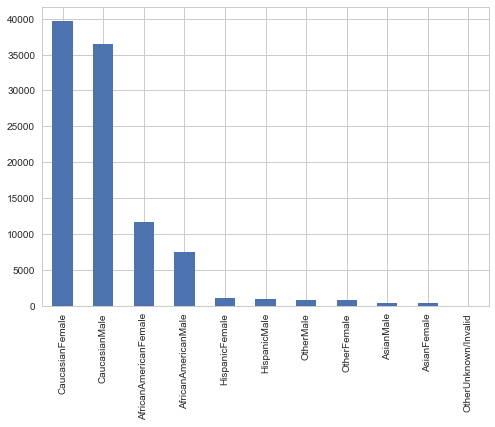

In [37]:
diab['race_gender'] = diab['race']+diab['gender']
pd.crosstab(diab.race_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['race_gender'].value_counts().plot(kind='bar')


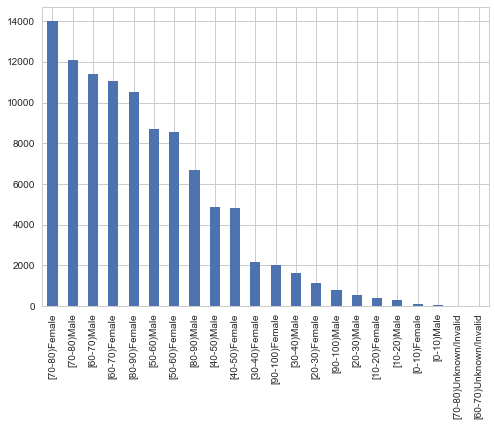

In [28]:
diab['age_gender'] = diab['age']+diab['gender']
pd.crosstab(diab.age_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['age_gender'].value_counts().plot(kind='bar')

In [3]:
print (df.dtypes)
print (df.info())

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [38]:
print(diab.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital      ...       diabetesMed readmitted  readmitted_Group  \
0                 1      ...                No         

#### Are there other features that could be added to the data or created from existing features? Which ones?
with the high number of missing values in weight, we theorized that this could be a result of that it is not a medical requirement for those patient.  We imputted a new column "weight_status" with all "?" == "Not measured" and all else as "Measured".

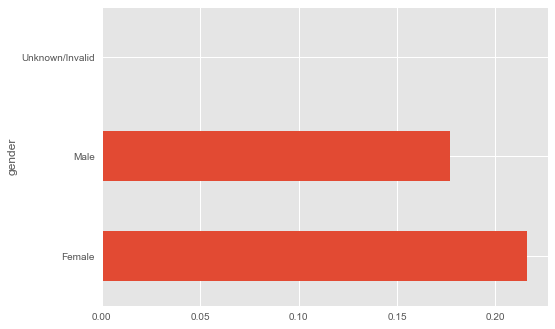

In [40]:
# pd.crosstab(df.race, df.gender).apply(lambda r: r/r.sum(), axis=1)
plt.style.use('ggplot')
def mean(numbers):
    return float(count(numbers)) / max(len(numbers), 1)

diab_grouped = diab.groupby(by='gender')
readmitted_x = diab_grouped.number_emergency.mean()
ax = readmitted_x.plot(kind='barh')

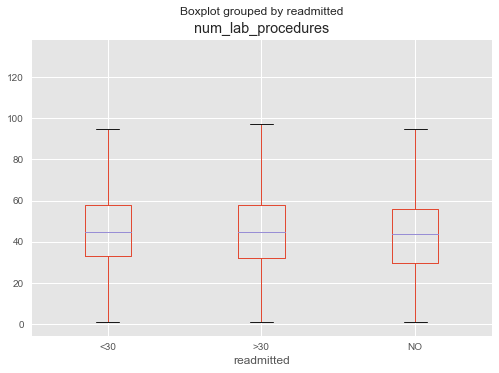

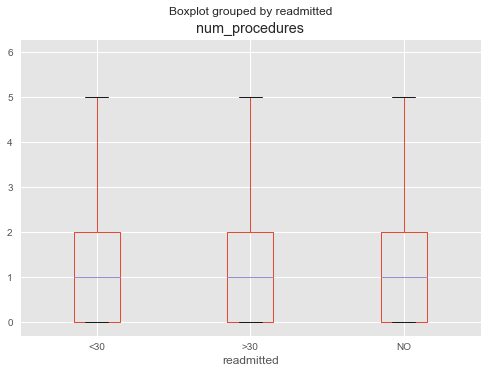

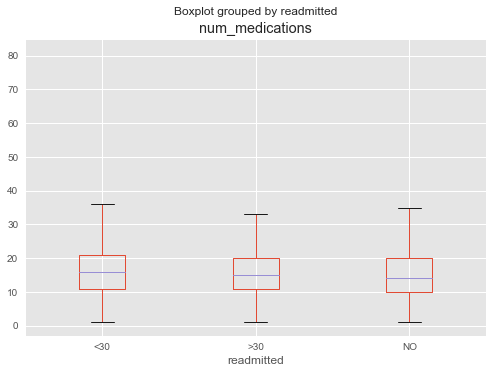

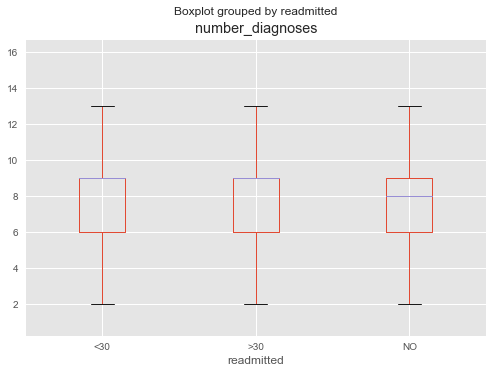

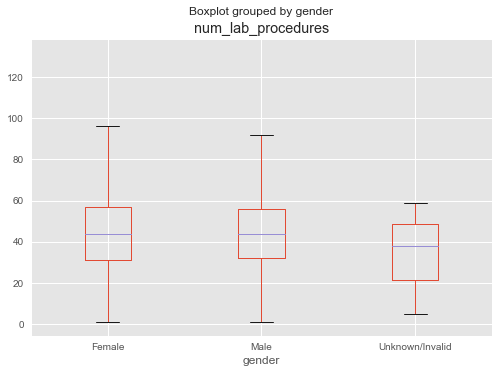

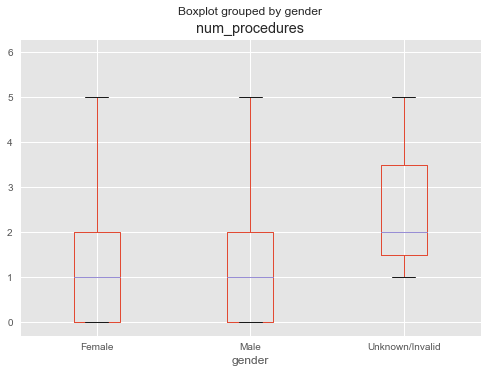

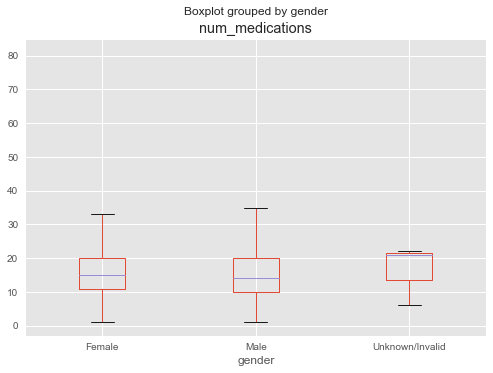

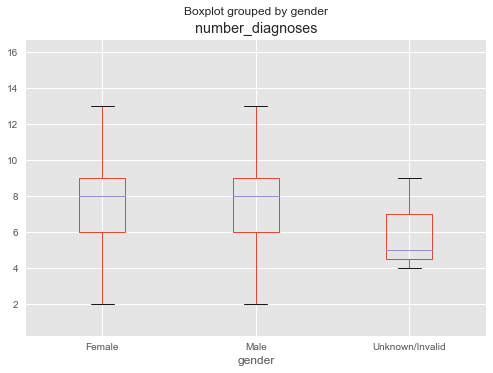

In [42]:
pd.crosstab(diab.readmitted, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.diabetesMed, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.admission_source_id, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.num_lab_procedures).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.A1Cresult).apply(lambda r: r/r.sum(), axis=1)


ax = diab.boxplot(column='num_lab_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_medications', by = 'readmitted')
ax = diab.boxplot(column='number_diagnoses', by = 'readmitted')

ax = diab.boxplot(column='num_lab_procedures', by = 'gender')
ax = diab.boxplot(column='num_procedures', by = 'gender')
ax = diab.boxplot(column='num_medications', by = 'gender')
ax = diab.boxplot(column='number_diagnoses', by = 'gender')
# ax.set_yscale('log')

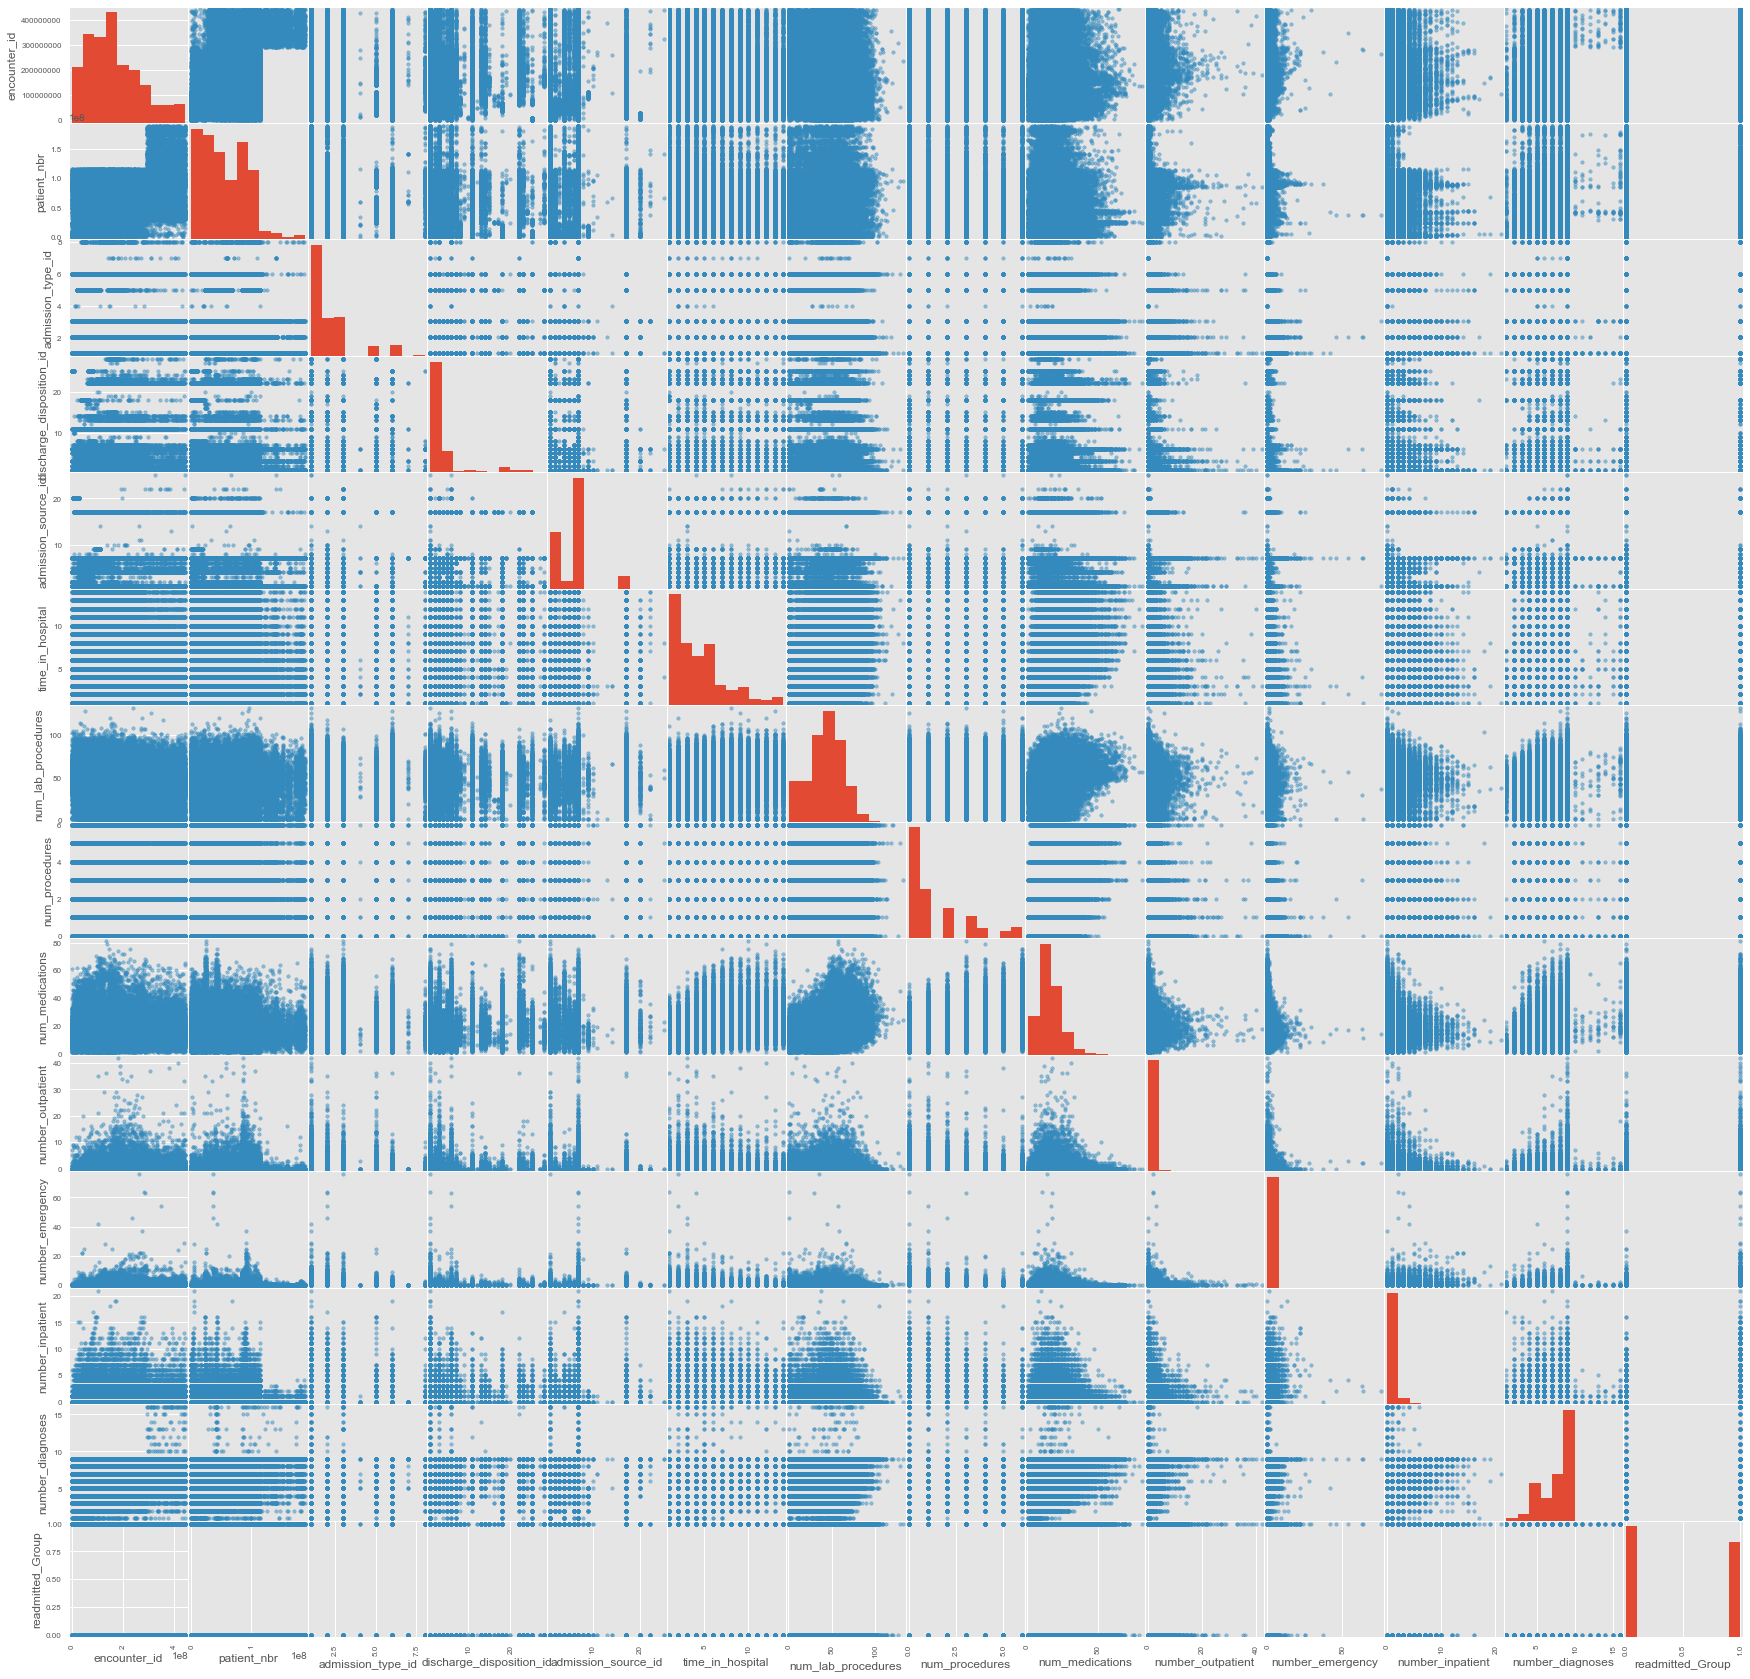

In [44]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(diab,figsize=(30, 30))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDACB08400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EDA1EEF7F0>]], dtype=object)

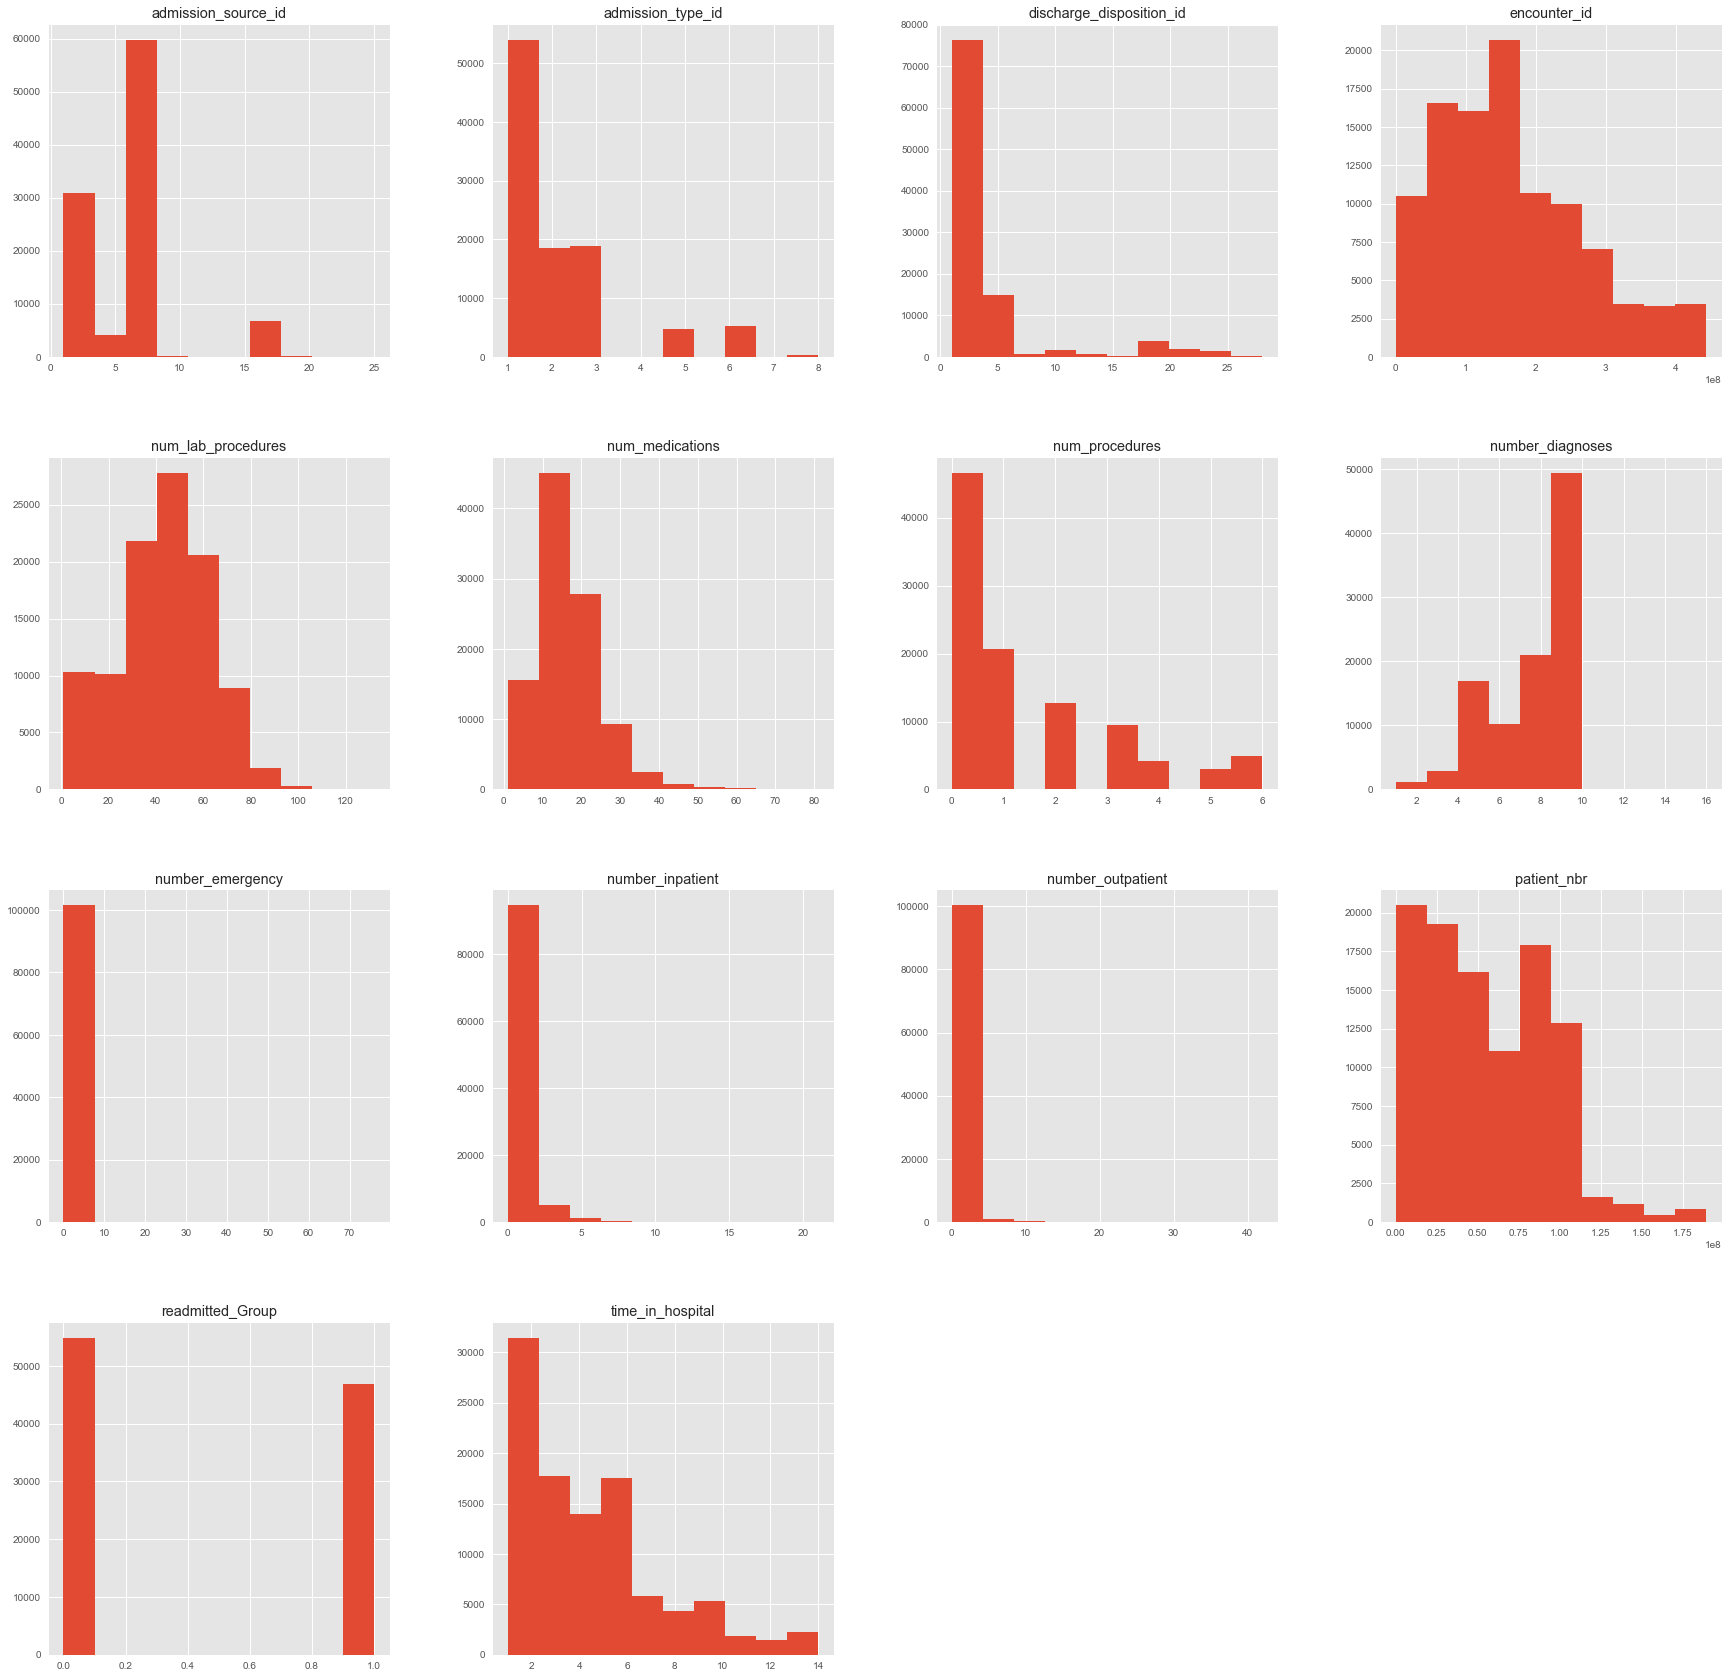

In [45]:
diab_hist =pd.DataFrame({'metformin':np.random.randn(100)
                 ,'repaglinide':np.random.randn(100)
                 ,'nateglinide':np.random.randn(100)
                 ,'chlorpropamide':np.random.randn(100)
                 ,'glimepiride':np.random.randn(100)
                 ,'acetohexamide':np.random.randn(100)
                 ,'glipizide':np.random.randn(100)
                 ,'glyburide':np.random.randn(100)
                 ,'tolbutamide':np.random.randn(100)
                  ,'pioglitazone':np.random.randn(100)
                  ,'rosiglitazone':np.random.randn(100)
                  ,'acarbose':np.random.randn(100)
                  ,'miglitol':np.random.randn(100)
                  ,'troglitazone':np.random.randn(100)
                  ,'tolazamide':np.random.randn(100)
                  ,'examide':np.random.randn(100)
                  ,'citoglipton':np.random.randn(100)
                  ,'insulin':np.random.randn(100)
                  ,'glyburide-metformin':np.random.randn(100)
                  ,'glipizide-metformin':np.random.randn(100)
                  ,'glimepiride-pioglitazone':np.random.randn(100)
                  ,'metformin-rosiglitazone':np.random.randn(100)
                  ,'metformin-pioglitazone':np.random.randn(100)
                 })
diab.hist(figsize=(30,30))